In [1]:
import pandas as pd, numpy as np
import os, shutil
from glob import glob
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore, Back, Style
sns.set(style='dark')

In [2]:
from pathlib import Path
dataset_dir = Path('/home/jnickg/datasets/kaggle.com/awsaf49/cbis-ddsm-breast-cancer-image-dataset')

dataset_dir.exists()

True

In [3]:
dicom_info_csv_path = dataset_dir / 'csv/dicom_info.csv'
df = pd.read_csv(str(dicom_info_csv_path))
df['image_path'] = df.image_path.apply(lambda x: x.replace('CBIS-DDSM', str(dataset_dir)))
df.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,/home/jnickg/datasets/kaggle.com/awsaf49/cbis-...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,/home/jnickg/datasets/kaggle.com/awsaf49/cbis-...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,/home/jnickg/datasets/kaggle.com/awsaf49/cbis-...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/home/jnickg/datasets/kaggle.com/awsaf49/cbis-...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,/home/jnickg/datasets/kaggle.com/awsaf49/cbis-...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [4]:
df.columns

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')

In [5]:
example_row = df.iloc[10]
example_row

file_path                                      CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...
image_path                                     /home/jnickg/datasets/kaggle.com/awsaf49/cbis-...
AccessionNumber                                                                              NaN
BitsAllocated                                                                                 16
BitsStored                                                                                    16
BodyPartExamined                                                                          BREAST
Columns                                                                                      809
ContentDate                                                                             20160503
ContentTime                                                                           131321.302
ConversionType                                                                               WSD
HighBit                       

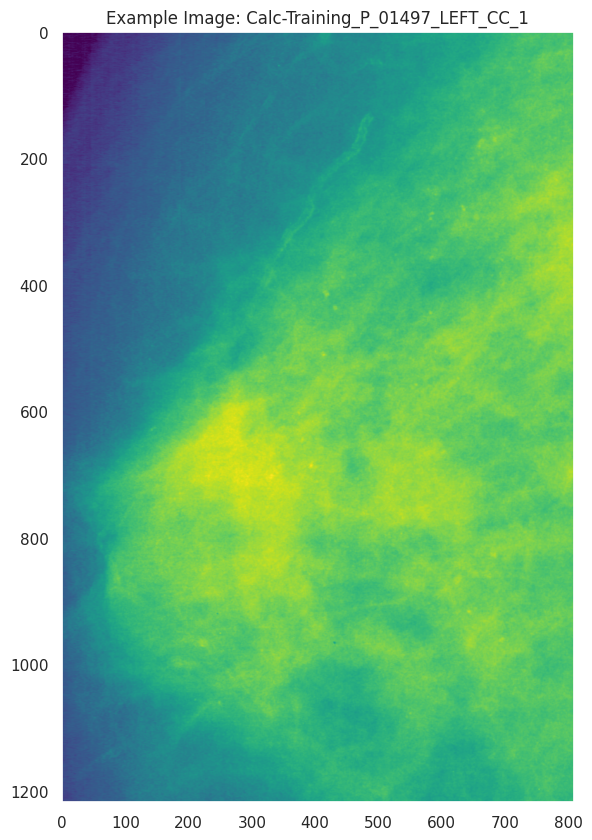

In [6]:
def show_img(path, title:str=None):
    img = cv2.imread(path,0)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='viridis')
    if title is not None: plt.title(title)
    plt.show()
    plt.close()

show_img(example_row.image_path, f'Example Image: {example_row.PatientID}')

We can see some microcalcifications in the image above, which is a good sign (for us).

In [23]:
series = df.SeriesDescription.value_counts(dropna=False)
series

SeriesDescription
cropped images           3567
ROI mask images          3247
full mammogram images    2857
NaN                       566
Name: count, dtype: int64

/tmp/ipykernel_86178/2428605967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(series, palette='viridis')


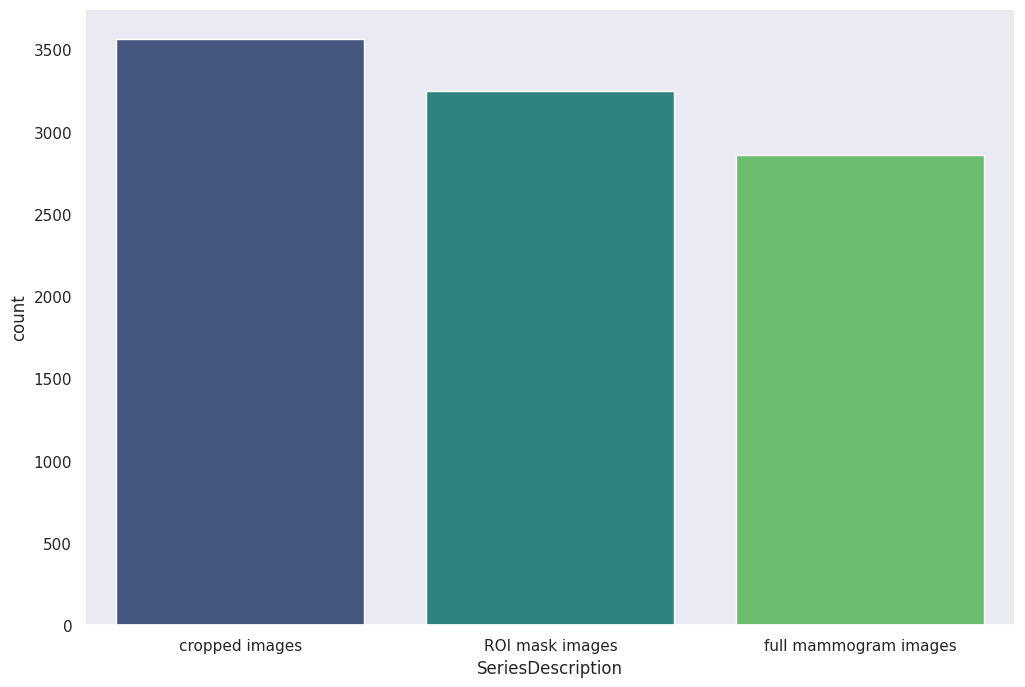

In [46]:
plt.figure(figsize=(12,8))
sns.barplot(series, palette='viridis')
plt.show()
plt.close()